In [176]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R
import os

#import scienceplots
#
#plt.style.use(['ieee','std-colors'])
#plt.rcParams.update({
#    "font.family": "serif",   # specify font family here
#    "font.serif": ["Times New Roman"],  # specify font here
#    "font.size":11})          # specify font size here


In [177]:
def plot_joint_states(joint_states, target="Position", fig=None, axs=None):
    n = joint_states.shape[1]
    
    if fig is None:
        if n == 3:
            fig, axs = plt.subplots(1, 3, figsize=(8, 4))
            fig.tight_layout(pad=5.0)
        else:
            fig, axs = plt.subplots(2, 3, figsize=(12, 8))
            fig.tight_layout(pad=5.0)

    for i, ax in enumerate(axs.flat):
        ax.plot(joint_states[:, i])
        ax.set_title(f'Joint {i+1}')
        ax.set_xlabel('Time')
        ax.set_ylabel(f'{target}')

    return fig, axs


In [178]:
exp_name = "Throw_Bin"
model = "Default_fifo10" #"BR_20Hz_Full_DG, BR_20Hz_Robust_COM", "BR_20Hz_Robust_POS"
target = "Real"
library = "rl_games" #"skrl"
seed = 0
dataset_dir = f"../results/{library}/{exp_name}/{model}/{target}/seed{{}}"
traj_list = os.listdir(dataset_dir.format(seed))


In [179]:
succTrajs = []
block_pos_Error = []
ACC = []
ACTION = []
n_success = 0
n_drops = 0
for seed in range(1):
    results_dir = f"../results/{library}/{exp_name}/{model}/{target}/seed{{}}" #DYN_IL
    print("Results Directory: ", results_dir.format(seed))
    n = len(os.listdir(results_dir.format(seed))) - 1
    for i in range(n):
        traj_ind = "{:03d}".format(i)
        obs_traj = np.loadtxt(os.path.join(results_dir.format(seed), traj_ind,"obs_traj.txt"), delimiter=',')
        success_traj = np.loadtxt(os.path.join(results_dir.format(seed), traj_ind,"success_traj.txt"), delimiter=',')
        action_traj = np.loadtxt(os.path.join(results_dir.format(seed), traj_ind,"action_traj.txt"), delimiter=',')
        jointacc_traj = np.loadtxt(os.path.join(dataset_dir.format(seed), traj_ind,"jointacc_traj.txt"), delimiter=',')[:,:]




        ee_pos = obs_traj[:, 12:15]*100
        object_pos = obs_traj[:, 27:30]*100
        object_relPos = object_pos - ee_pos

        #print(success_traj)
        is_success = (sum(success_traj)==len(success_traj))

        
        if is_success:
            #print("Success: ", traj_ind)
            n_success += 1  
            succTrajs.append(traj_ind)
            ACC.append(jointacc_traj)
            ACTION.append(action_traj)
            
print(f"n_success: {100*n_success/n}")
print(f"n_drops: {100*n_drops/n}")
print("Success Trajs: ", succTrajs)


Results Directory:  ../results/rl_games/Throw_Bin/Default_fifo10/Real/seed0
n_success: 82.8125
n_drops: 0.0
Success Trajs:  ['000', '001', '002', '003', '005', '006', '007', '008', '010', '012', '013', '014', '015', '016', '017', '018', '020', '021', '022', '023', '024', '025', '026', '027', '028', '029', '030', '032', '033', '034', '035', '036', '039', '040', '042', '043', '044', '045', '046', '047', '048', '049', '050', '051', '052', '054', '055', '056', '057', '059', '060', '062', '063']


ACC mean:  [ 0.00000000e+00  3.05149779e-07  2.59758786e-07 -1.89594953e-07
  0.00000000e+00  0.00000000e+00]
ACC std:  [0.         6.62851079 4.56179805 6.2978904  0.         0.        ]
ACC min:  [  0.         -25.90189934 -18.6829567  -21.5355835    0.
   0.        ]
ACC max:  [ 0.         16.00000954 16.00000954 22.15524292  0.          0.        ]


(<Figure size 1200x800 with 6 Axes>,
 array([[<Axes: title={'center': 'Joint 1'}, xlabel='Time', ylabel='Acceleration'>,
         <Axes: title={'center': 'Joint 2'}, xlabel='Time', ylabel='Acceleration'>,
         <Axes: title={'center': 'Joint 3'}, xlabel='Time', ylabel='Acceleration'>],
        [<Axes: title={'center': 'Joint 4'}, xlabel='Time', ylabel='Acceleration'>,
         <Axes: title={'center': 'Joint 5'}, xlabel='Time', ylabel='Acceleration'>,
         <Axes: title={'center': 'Joint 6'}, xlabel='Time', ylabel='Acceleration'>]],
       dtype=object))

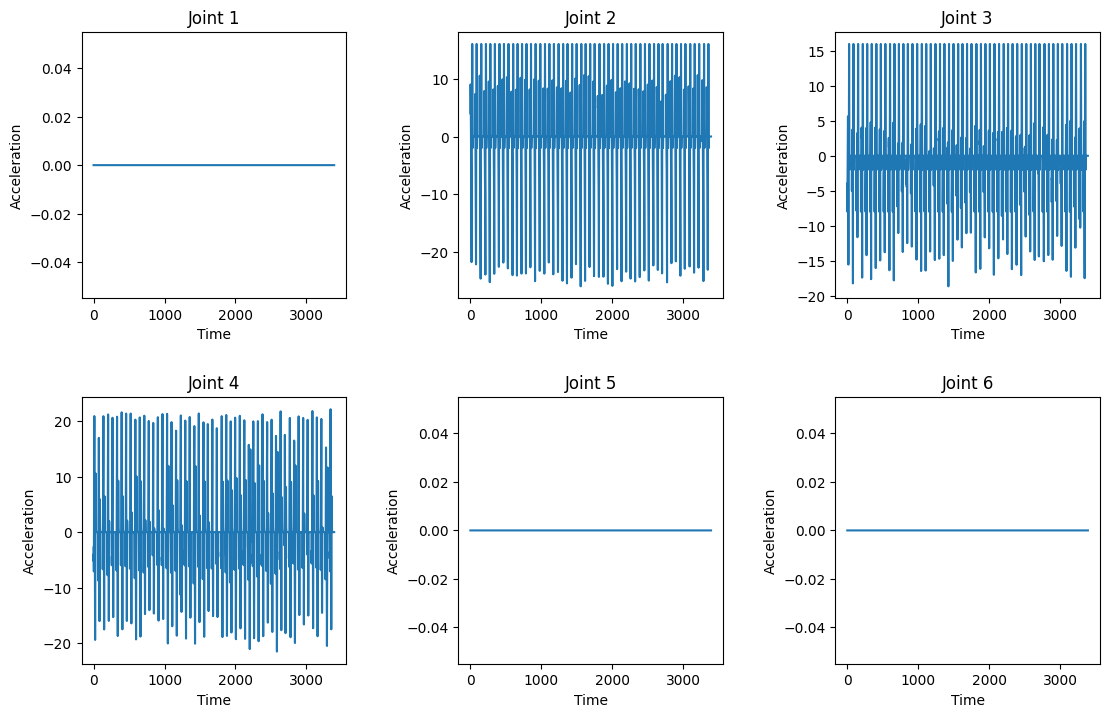

In [180]:
ACC = np.concatenate(ACC, axis=0)
# ACC statistics
print("ACC mean: ", ACC.mean(axis=0))
print("ACC std: ", ACC.std(axis=0))
print("ACC min: ", ACC.min(axis=0))
print("ACC max: ", ACC.max(axis=0))
plot_joint_states(ACC, target="Acceleration")

ACTION mean:  [-0.34818319 -0.16501016  0.14952446]
ACTION std:  [0.44362682 0.48949081 0.66448717]
ACTION min:  [-1. -1. -1.]
ACTION max:  [1. 1. 1.]


(<Figure size 800x400 with 3 Axes>,
 array([<Axes: title={'center': 'Joint 1'}, xlabel='Time', ylabel='ACTION'>,
        <Axes: title={'center': 'Joint 2'}, xlabel='Time', ylabel='ACTION'>,
        <Axes: title={'center': 'Joint 3'}, xlabel='Time', ylabel='ACTION'>],
       dtype=object))

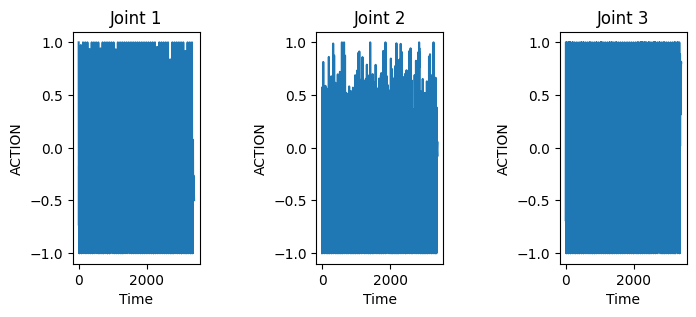

In [181]:
ACTION = np.concatenate(ACTION, axis=0)
# ACTION statistics
print("ACTION mean: ", ACTION.mean(axis=0))
print("ACTION std: ", ACTION.std(axis=0))
print("ACTION min: ", ACTION.min(axis=0))
print("ACTION max: ", ACTION.max(axis=0))
plot_joint_states(ACTION, target="ACTION")

In [182]:
traj_ind = "002"
obs_traj = np.loadtxt(os.path.join(dataset_dir.format(seed), traj_ind,"obs_traj.txt"), delimiter=',')
action_traj = np.loadtxt(os.path.join(dataset_dir.format(seed), traj_ind,"action_traj.txt"), delimiter=',')[:,:]
jointacc_traj = np.loadtxt(os.path.join(dataset_dir.format(seed), traj_ind,"jointacc_traj.txt"), delimiter=',')[:,:]
states_traj = np.loadtxt(os.path.join(dataset_dir.format(seed), traj_ind,"states_traj.txt"), delimiter=',')

# joint_pos_fifo = self.joint_pos_fifo.reshape(-1, 3*self.cfg.histLen) if self.cfg.histLen > 1 else self.joint_q[:,1:4].clone()
# process joint_pos_fifo to get only the last action

fifo = 10
print(obs_traj.shape)
joint_pos = obs_traj[:, 3*(fifo-1):3*fifo] 

#joint_pos = obs_traj[:, :6]
joint_vel = obs_traj[:, (3*fifo+3*(fifo-1)):(3*fifo+3*fifo)]

ee_pos = obs_traj[:, 12:15]
ee_rot = obs_traj[:, 15:21]
ee_vel = obs_traj[:, 21:27]

object_pos = obs_traj[:, 27:30]
object_rot = obs_traj[:, 30:36]
object_vel = obs_traj[:, 36:42]

target_eePos = obs_traj[:, 42:45]
block_sizes = obs_traj[:, 45:48]
block_height = obs_traj[:, 47:48]

histLen = 3
#action_fifo = obs_traj[:, 48:48+histLen*6].reshape(-1, 6, histLen)

#action_traj2= action_fifo[:,:,-1]



# estimate acc from pos
dt_ctrl = 1/20
joint_acc_hat = (joint_pos[1:] - joint_pos[:-1] - joint_vel[:-1]*dt_ctrl)/(0.5*dt_ctrl**2)


states_traj.shape


(64, 132)


(64, 53)

(<Figure size 800x400 with 3 Axes>,
 array([<Axes: title={'center': 'Joint 1'}, xlabel='Time', ylabel='GT'>,
        <Axes: title={'center': 'Joint 2'}, xlabel='Time', ylabel='GT'>,
        <Axes: title={'center': 'Joint 3'}, xlabel='Time', ylabel='GT'>],
       dtype=object))

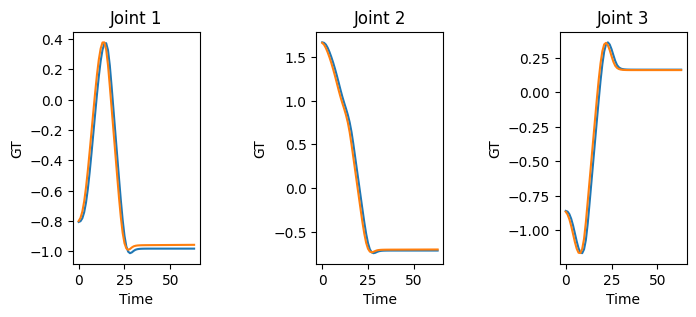

In [183]:
fig,ax = plot_joint_states(joint_pos[:], target="Position")
joint_pos_gt = states_traj[:, 27:33]
plot_joint_states(joint_pos_gt[:,1:4], target="GT",fig=fig, axs=ax)

Joint Vel 0:  [3.00000072 3.00000072 2.99999952]


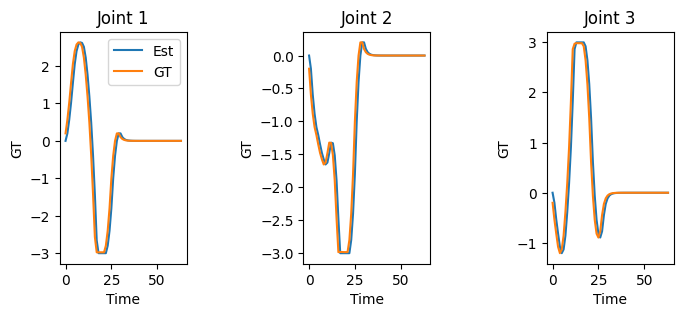

In [184]:
fig, axs=plot_joint_states(joint_vel[:], target="Velocity")
dt = 1/20
joint_vel_hat = np.diff(joint_pos, axis=0)/dt
#fig, axs = plot_joint_states(joint_vel_hat[:], target="Velocity_hat", fig=fig, axs=axs)

joint_vel_gt = states_traj[:, 33:39]
plot_joint_states(joint_vel_gt[:,1:4], target="GT", fig=fig, axs=axs)

print("Joint Vel 0: ", np.abs(joint_vel).max(axis=0))
axs[0].legend(["Est", "GT"])

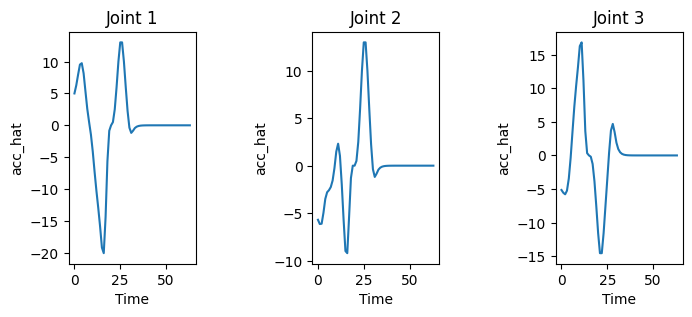

In [185]:

joint_acc_hat_2 = np.gradient(joint_vel, axis=0)/dt

joint_acc_hat_3 = np.gradient(np.gradient(joint_pos, axis=0, edge_order=2), axis=0,edge_order=2)/dt**2
joint_acc_hat_4 = np.gradient(np.gradient(joint_pos, axis=0, edge_order=2), axis=0,edge_order=2)/dt**2

#fig, axs = plot_joint_states(joint_acc_hat_2[:], target="acc_hat_2", fig=fig, axs=axs)
#fig, axs = plot_joint_states(joint_acc_hat[:], target="acc_hat")
fig, axs = plot_joint_states(joint_acc_hat_3[:], target="acc_hat")

#plot_joint_states(joint_acc_hat_3[:], target="Smoothed acc_hat", fig=fig, axs=axs)
#plot_joint_states(joint_acc_hat_4[:], target="Smoothed acc_hat", fig=fig, axs=axs)

#axs[0,0].legend(["acc_hat", "acc_hat2", "acc_hat3"])



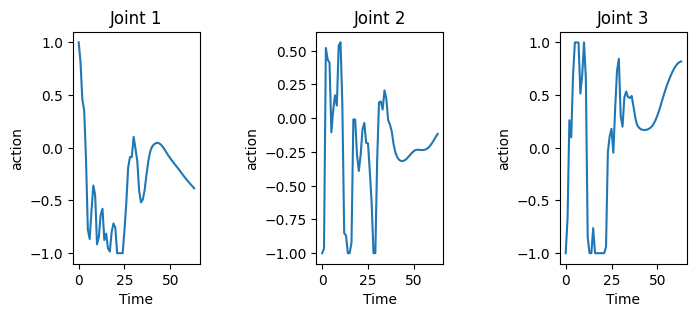

In [186]:
fig, axs = plot_joint_states(action_traj[:,], target="action")
#plot_joint_states(action_traj2[:], target="action", fig=fig, axs=axs)

jointacc_traj:  (64, 6)


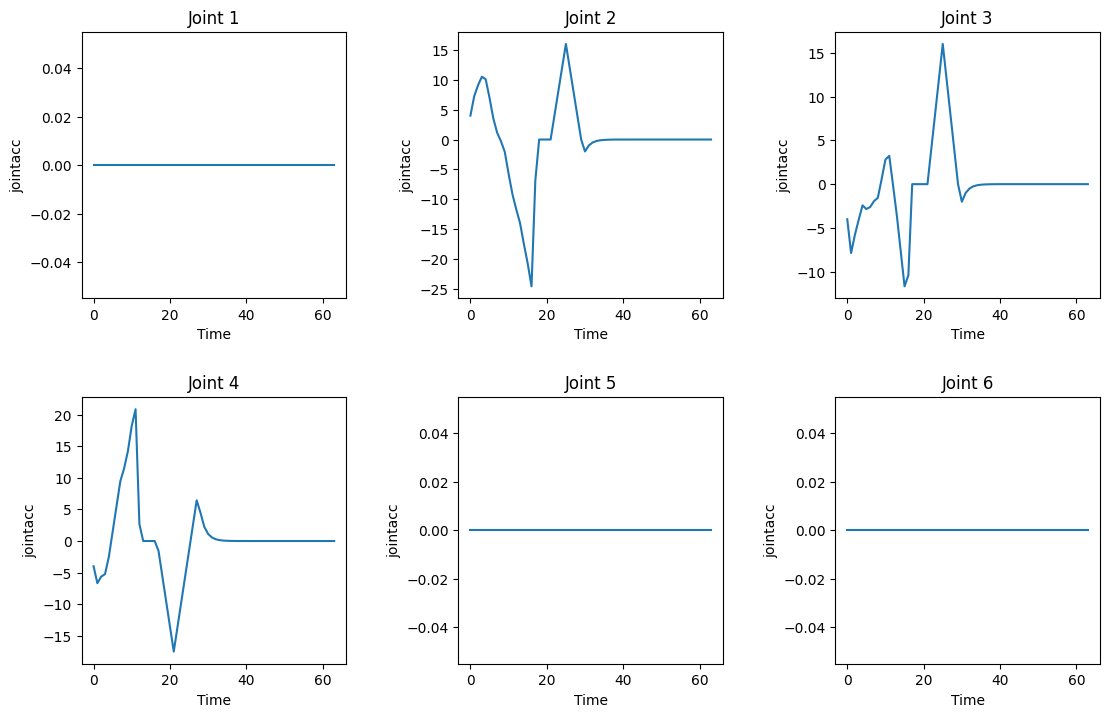

In [187]:
fig, axs = plot_joint_states(jointacc_traj[:], target="jointacc")
print("jointacc_traj: ", jointacc_traj.shape)


Target Pos: [ 3.5         0.133      -0.73000002]
Max block vel: 5.6885407315524406


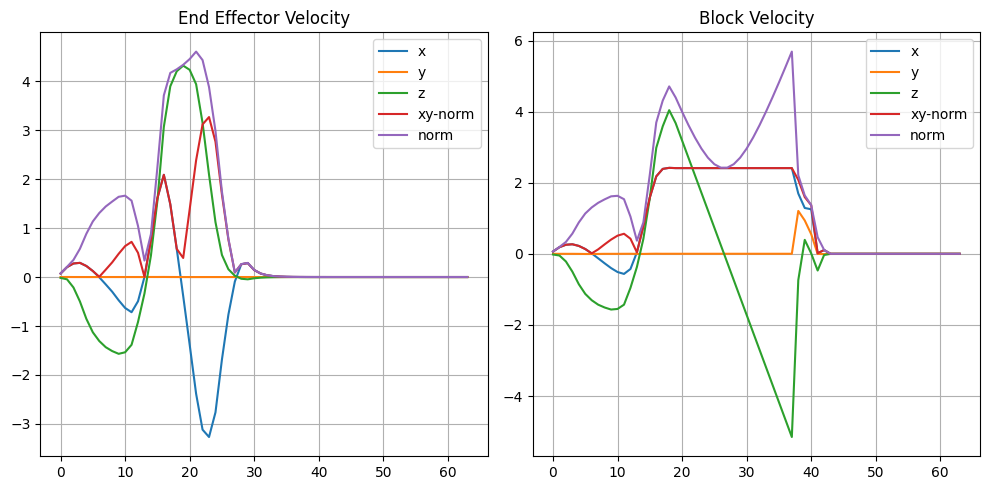

In [188]:
block_pos = states_traj[:, :3]
block_quat = states_traj[:, 3:7]
block_vel = states_traj[:, 7:13]
post_throw = states_traj[:, 13]
ee_pos = states_traj[:, 14:17]
ee_quat = states_traj[:, 17:21]
ee_vel = states_traj[:, 21:27]
joint_pos = states_traj[:, 27:33]
joint_vel = states_traj[:, 33:39]
target_pos = states_traj[:, 39:42]

print("Target Pos:", target_pos[0])
ee_vel_norm = np.linalg.norm(ee_vel[:,:3], axis=1) # linear vel
ee_vel_xy_norm = np.linalg.norm(ee_vel[:,:2], axis=1) # linear vel

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot EE velocity
ax1.plot(ee_vel[:, 0], label="x")
ax1.plot(ee_vel[:, 1], label="y")
ax1.plot(ee_vel[:, 2], label="z")
ax1.plot(ee_vel_xy_norm, label="xy-norm")
ax1.plot(ee_vel_norm, label="norm")
ax1.set_title("End Effector Velocity")
ax1.legend()
ax1.grid(True)

# Plot block velocity
ax2.plot(block_vel[:, 0], label="x")
ax2.plot(block_vel[:, 1], label="y")
ax2.plot(block_vel[:, 2], label="z")
block_vel_xy_norm = np.linalg.norm(block_vel[:,:2], axis=1)
block_vel_norm = np.linalg.norm(block_vel[:,:3], axis=1)
print("Max block vel:", np.max(block_vel_norm))
ax2.plot(block_vel_xy_norm, label="xy-norm")
ax2.plot(block_vel_norm, label="norm")
ax2.set_title("Block Velocity")
ax2.legend()
ax2.grid(True)

plt.tight_layout()


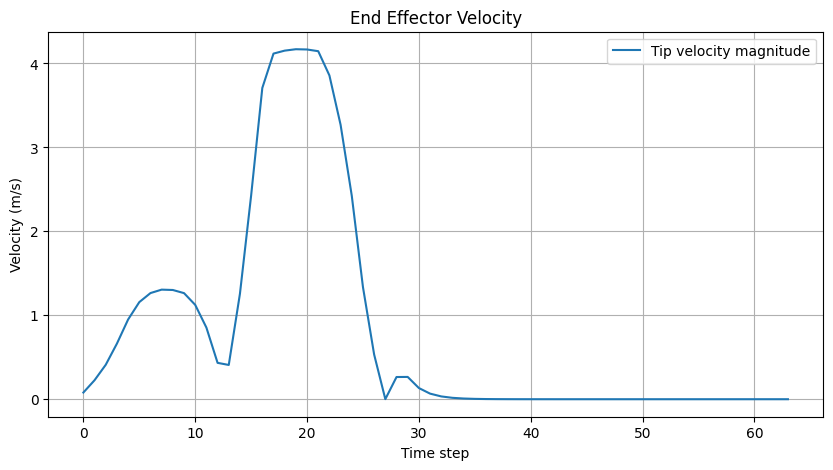

In [189]:
# Let's model velocity for first 3 joints
# Assuming joint lengths l1 and l2 (in meters)
l1 = 0.4  # Length of first link
l2 = 0.5  # Length of second link

# Get positions and velocities for first 2 joints
theta1 = joint_pos[:, 1]  # First joint angle
theta2 = joint_pos[:, 2]  # Second joint angle
omega1 = joint_vel[:, 1]  # First joint angular velocity  
omega2 = joint_vel[:, 2]  # Second joint angular velocity

# Calculate end effector position
x = l1 * np.cos(theta1) + l2 * np.cos(theta1 + theta2)
y = l1 * np.sin(theta1) + l2 * np.sin(theta1 + theta2)

# Calculate velocity components
vx = -l1 * omega1 * np.sin(theta1) - l2 * (omega1 + omega2) * np.sin(theta1 + theta2)
vy = l1 * omega1 * np.cos(theta1) + l2 * (omega1 + omega2) * np.cos(theta1 + theta2)

# Calculate velocity magnitude
v_magnitude = np.sqrt(vx**2 + vy**2)

plt.figure(figsize=(10, 5))
plt.plot(v_magnitude, label='Tip velocity magnitude')
plt.xlabel('Time step')
plt.ylabel('Velocity (m/s)')
plt.title('End Effector Velocity')
plt.legend()
plt.grid(True)


### Process Trajs for real robot deployment


jointPosAll shape: (3392, 6)
jointAccAll shape: (3392, 6)
VEL max:  [1.00754846e-07 7.22483918e-03 2.82503605e+00 2.01290116e-01
 2.98451495e+00 2.05764323e-02]


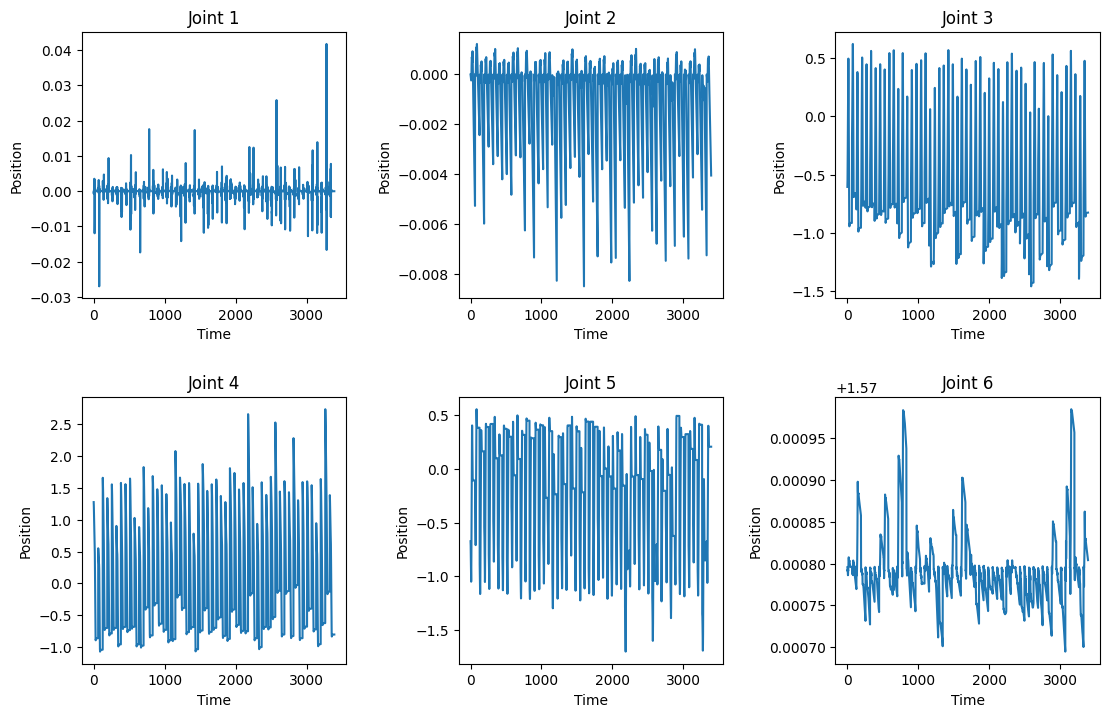

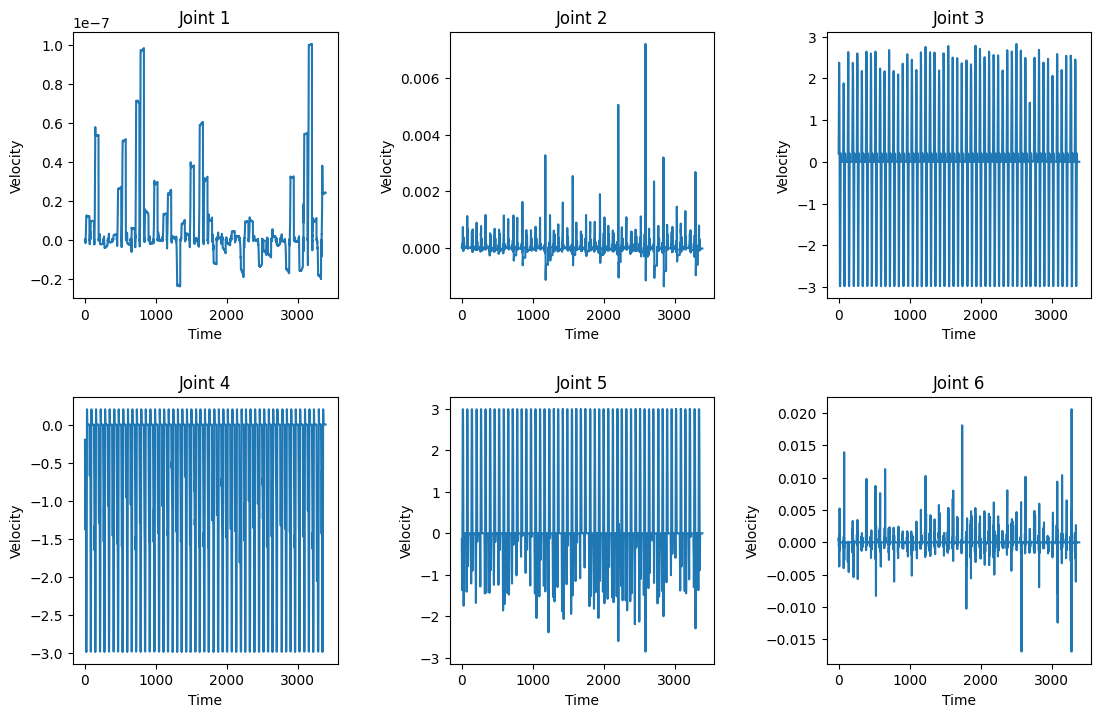

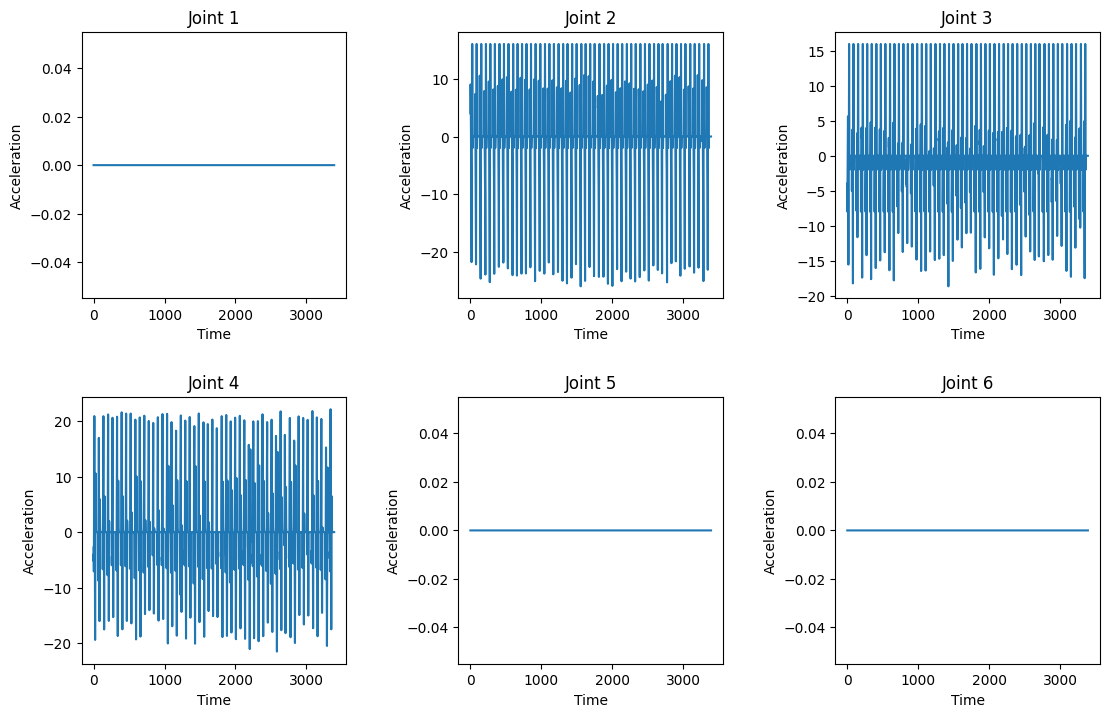

In [190]:
jointPosAll = []
jointVelAll = []
jointAccAll = []

eeVel = []

for trajID in succTrajs:
    obs_traj = np.loadtxt(os.path.join(dataset_dir.format(seed), trajID,"obs_traj.txt"), delimiter=',')
    #action_traj = np.loadtxt(os.path.join(dataset_dir.format(seed), trajID,"action_traj.txt"), delimiter=',')[:,:]
    jointAcc = np.loadtxt(os.path.join(dataset_dir.format(seed), trajID,"jointacc_traj.txt"), delimiter=',')[:,:]

    states_traj = np.loadtxt(os.path.join(dataset_dir.format(seed), trajID,"states_traj.txt"), delimiter=',')
    jointPos = states_traj[:, 26:32]
    #jointVel_hat = np.gradient(jointPos, axis=0)/dt
    jointVel = states_traj[:, 32:38]
    ee_vel = np.linalg.norm(states_traj[:, 20:23], axis=1)
    jointPosAll.append(jointPos)
    #jointVelAll.append(jointVel_hat)
    jointVelAll.append(jointVel)
    jointAccAll.append(jointAcc)
    eeVel.append(ee_vel)

    max_vel = ee_vel.max()
    if max_vel > 5.0:
        print(f"High EE VEL in traj {trajID}: {max_vel}")

jointPosAll = np.concatenate(jointPosAll, axis=0)
jointVelAll = np.concatenate(jointVelAll, axis=0)
jointAccAll = np.concatenate(jointAccAll, axis=0)
eeVel = np.concatenate(eeVel, axis=0)

plot_joint_states(jointPosAll, target="Position")
plot_joint_states(jointVelAll, target="Velocity")
plot_joint_states(jointAccAll, target="Acceleration")

print("jointPosAll shape:", jointPosAll.shape)
print("jointAccAll shape:", jointAccAll.shape)

print("VEL max: ", jointVelAll.max(axis=0))

In [191]:
print("EE VEL max: ", eeVel.max(axis=0))
print("EE VEL mean: ", eeVel.mean(axis=0))


EE VEL max:  3.9747528098531637
EE VEL mean:  0.42114845112473465


In [192]:
print(jointPosAll.shape[0]/64)
print(jointPosAll.shape)
print(jointAccAll.shape[0]/64)

53.0
(3392, 6)
53.0


In [193]:
np.save("../scripts/jointPosAll.npy", jointPosAll)
np.save("../scripts/jointVelAll.npy", jointVelAll)
np.save("../scripts/jointAccAll.npy", jointAccAll)



#### Analyze real traj

In [194]:
traj_id = 1
control_freq = 20
realTraj = np.loadtxt(f"../data/real/trajID{traj_id}_position_velocity_real_Throw_{control_freq}Hz.csv",  delimiter=',', skiprows=1)
realTraj.shape

Time = realTraj[:, 0]
jointPosReal = realTraj[:, 1:7]
jointVelReal = realTraj[:, 7:13]
jointPosSim = realTraj[:, 13:19]
jointVelSim = realTraj[:, 19:25]
jointAccSim = realTraj[:, 25:31]


#(joint_pos[1:] - joint_pos[:-1] - joint_vel[:-1]*dt_ctrl)/(0.5*dt_ctrl**2)
jointACC_dummy = (jointPosSim[1:] - jointPosSim[:-1] - jointVelSim[:-1]*dt_ctrl)/(0.5*dt_ctrl**2)
joint_pos_hat = np.cumsum(np.cumsum(jointACC_dummy,axis=0)*dt,axis=0)*dt + jointPosSim[0]

(64, 6)
(64, 6)


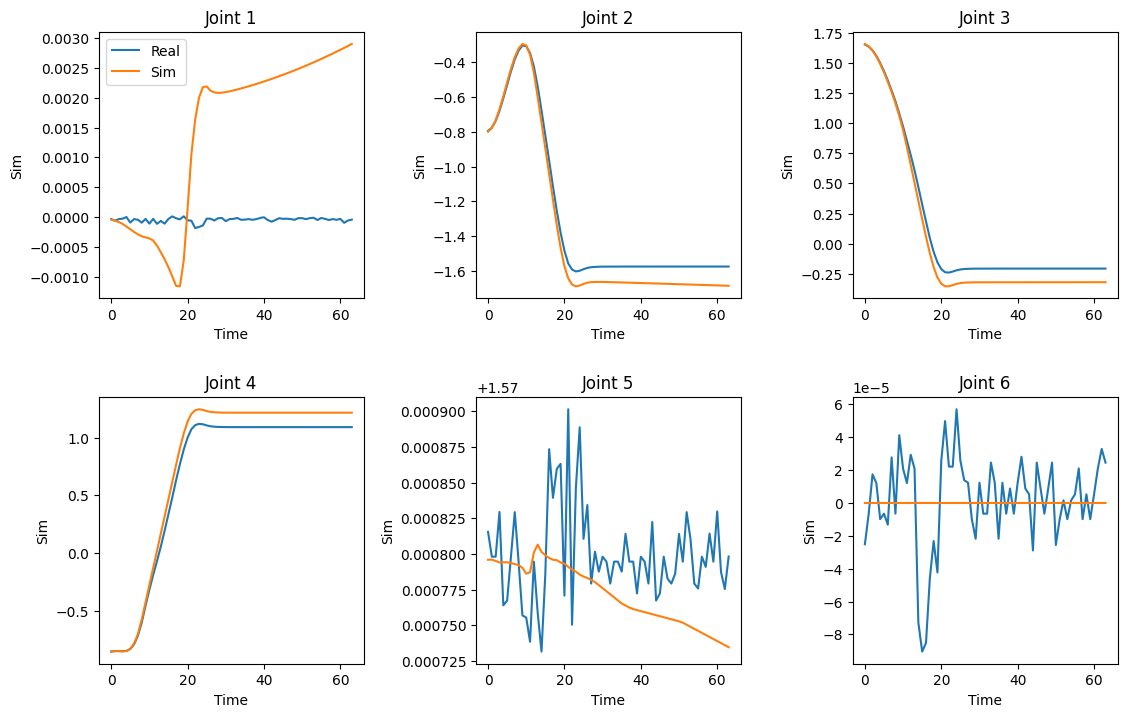

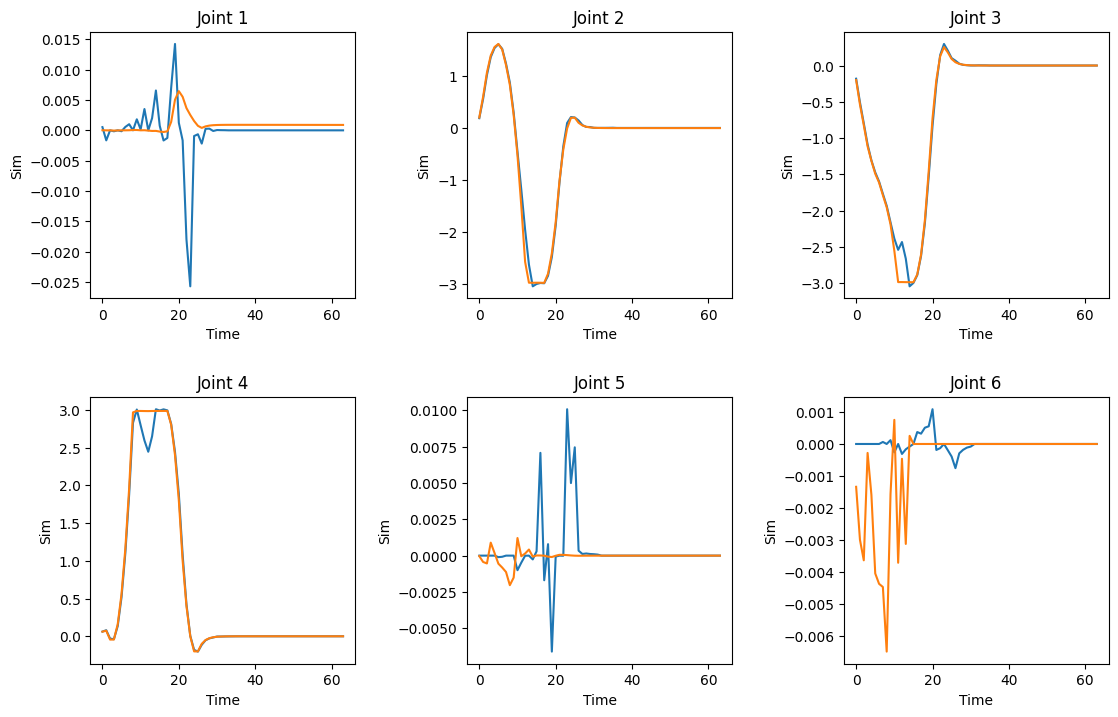

In [195]:
fig, ax = plot_joint_states(jointPosReal[:], target="Real")
plot_joint_states(jointPosSim[:], target="Sim", fig=fig, axs=ax)
#plot_joint_states(joint_pos_hat, target="Sim", fig=fig, axs=ax)
ax[0,0].legend(["Real", "Sim","Est"])

fig, ax = plot_joint_states(jointVelReal[:], target="Real")
plot_joint_states(jointVelSim[:], target="Sim", fig=fig, axs=ax)

print(jointVelReal.shape)
print(jointVelSim.shape)